<a href="https://colab.research.google.com/github/scadriano/publicprojects/blob/main/Aula%2011%20-%20Voz%20/%20Reconhecimento_de_Comandos_de_Voz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento de comandos de voz


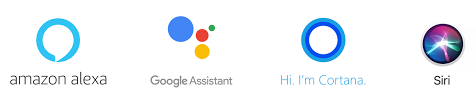

# Base de dados: Mini Speech Commands

O conjunto de dados original consiste em mais de 105.000 arquivos de áudio no formato de arquivo de áudio WAV (Waveform) de pessoas dizendo 35 palavras diferentes. Mais detalhes sobre a base de dados podem ser vistos nestes link: [speech_commands](https://www.tensorflow.org/datasets/catalog/speech_commands)

Para economizar tempo com o carregamento de dados, será usada uma versão menor do conjunto de dados de Comandos de Fala chamada **mini_speech_commands** que contém clipes de áudio curtos (um segundo ou menos) de 8 comandos: "down", "go", "left", "no", "right", "stop", "up" e "yes". 

* A taxa de amostragem para este conjunto de dados é de 16kHz.









# Importando as bibliotecas

In [ ]:
import glob
import os
import pathlib
import random
from datetime import datetime
import librosa
import librosa.display as ld
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
import seaborn as sns
sns.set()
from tqdm import tqdm

# EDA


## Baixando e carregando o dataset Mini Speech Commands

In [ ]:
!wget http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip -O mini_speech_commands.zip

--2022-06-25 12:29:02--  http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 74.125.137.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182082353 (174M) [application/zip]
Saving to: ‘mini_speech_commands.zip’

mini_speech_command 100%[===================>] 173.65M   156MB/s    in 1.1s    

2022-06-25 12:29:03 (156 MB/s) - ‘mini_speech_commands.zip’ saved [182082353/182082353]



In [ ]:
!unzip mini_speech_commands.zip -d '/content/'

In [ ]:
!rm mini_speech_commands.zip

In [ ]:
commands = []
for name in glob.glob(str('/content/mini_speech_commands') + '/*' + os.path.sep):
  #print(name.split('/')[-2])
  commands.append(name.split('/')[-2])

In [ ]:
commands

['right', 'up', 'no', 'go', 'yes', 'down', 'stop', 'left']

In [ ]:
commands_dict = {i: commands.index(i) for i in commands}
print(commands_dict)

{'right': 0, 'up': 1, 'no': 2, 'go': 3, 'yes': 4, 'down': 5, 'stop': 6, 'left': 7}


## Criando o dataset

In [ ]:
speech_data_list = []
for name in tqdm(glob.glob(str('/content/mini_speech_commands') + '/*/*')):
  speech_data_list.append(name)

100%|██████████| 8000/8000 [00:00<00:00, 373001.09it/s]


In [ ]:
random.seed(42)
random.shuffle(speech_data_list)

In [ ]:
speech_data_list

['/content/mini_speech_commands/yes/7d149b38_nohash_1.wav',
 '/content/mini_speech_commands/no/c79159aa_nohash_1.wav',
 '/content/mini_speech_commands/yes/fc94edb0_nohash_0.wav',
 '/content/mini_speech_commands/go/db9cd41d_nohash_0.wav',
 '/content/mini_speech_commands/right/7f74626f_nohash_2.wav',
 '/content/mini_speech_commands/left/14872d06_nohash_0.wav',
 '/content/mini_speech_commands/yes/2bdbe5f7_nohash_1.wav',
 '/content/mini_speech_commands/yes/9ff2d2f4_nohash_3.wav',
 '/content/mini_speech_commands/up/1b88bf70_nohash_0.wav',
 '/content/mini_speech_commands/go/a74f3917_nohash_1.wav',
 '/content/mini_speech_commands/left/105a0eea_nohash_0.wav',
 '/content/mini_speech_commands/yes/db9cd41d_nohash_1.wav',
 '/content/mini_speech_commands/go/26e573a9_nohash_0.wav',
 '/content/mini_speech_commands/right/7192fddc_nohash_1.wav',
 '/content/mini_speech_commands/stop/88053e92_nohash_1.wav',
 '/content/mini_speech_commands/left/5c8af87a_nohash_0.wav',
 '/content/mini_speech_commands/go/8c

In [ ]:
speech_data_labels = []
for audio in tqdm(speech_data_list):
  speech_data_labels.append(os.path.dirname(audio).split('/')[-1])

100%|██████████| 8000/8000 [00:00<00:00, 228637.84it/s]


In [ ]:
print(speech_data_labels)

['yes', 'no', 'yes', 'go', 'right', 'left', 'yes', 'yes', 'up', 'go', 'left', 'yes', 'go', 'right', 'stop', 'left', 'go', 'up', 'yes', 'left', 'yes', 'up', 'go', 'right', 'yes', 'left', 'yes', 'down', 'stop', 'up', 'stop', 'no', 'right', 'left', 'right', 'left', 'stop', 'yes', 'right', 'no', 'up', 'go', 'go', 'down', 'yes', 'right', 'down', 'down', 'go', 'yes', 'up', 'up', 'right', 'stop', 'stop', 'stop', 'down', 'down', 'stop', 'stop', 'go', 'stop', 'no', 'go', 'no', 'left', 'left', 'stop', 'right', 'down', 'up', 'go', 'yes', 'down', 'up', 'left', 'left', 'right', 'up', 'right', 'up', 'stop', 'right', 'left', 'stop', 'no', 'down', 'go', 'down', 'go', 'down', 'go', 'down', 'stop', 'down', 'left', 'right', 'up', 'yes', 'down', 'no', 'yes', 'stop', 'left', 'yes', 'no', 'right', 'yes', 'go', 'up', 'yes', 'no', 'yes', 'up', 'no', 'yes', 'yes', 'right', 'stop', 'left', 'up', 'stop', 'go', 'go', 'right', 'left', 'no', 'right', 'go', 'go', 'left', 'left', 'down', 'stop', 'go', 'up', 'stop', '

In [ ]:
len(speech_data_labels)

8000

In [ ]:
speech_data_labels.count('yes')

1000

In [ ]:
commands_dict['go']

3

In [ ]:
speech_label_int = []
for audio in tqdm(speech_data_labels):
  speech_label_int.append(commands_dict[audio])

100%|██████████| 8000/8000 [00:00<00:00, 878250.33it/s]


In [ ]:
print(speech_label_int)

[4, 2, 4, 3, 0, 7, 4, 4, 1, 3, 7, 4, 3, 0, 6, 7, 3, 1, 4, 7, 4, 1, 3, 0, 4, 7, 4, 5, 6, 1, 6, 2, 0, 7, 0, 7, 6, 4, 0, 2, 1, 3, 3, 5, 4, 0, 5, 5, 3, 4, 1, 1, 0, 6, 6, 6, 5, 5, 6, 6, 3, 6, 2, 3, 2, 7, 7, 6, 0, 5, 1, 3, 4, 5, 1, 7, 7, 0, 1, 0, 1, 6, 0, 7, 6, 2, 5, 3, 5, 3, 5, 3, 5, 6, 5, 7, 0, 1, 4, 5, 2, 4, 6, 7, 4, 2, 0, 4, 3, 1, 4, 2, 4, 1, 2, 4, 4, 0, 6, 7, 1, 6, 3, 3, 0, 7, 2, 0, 3, 3, 7, 7, 5, 6, 3, 1, 6, 3, 6, 2, 4, 7, 2, 1, 7, 7, 4, 6, 0, 5, 7, 1, 4, 6, 1, 2, 6, 2, 0, 2, 7, 0, 6, 7, 1, 5, 4, 2, 7, 6, 0, 0, 2, 0, 7, 4, 1, 2, 6, 3, 0, 7, 7, 7, 0, 0, 5, 2, 6, 7, 3, 4, 0, 1, 1, 7, 7, 2, 5, 5, 5, 1, 4, 3, 0, 7, 7, 2, 3, 1, 5, 3, 5, 6, 6, 2, 6, 2, 2, 2, 5, 7, 1, 7, 7, 1, 7, 3, 5, 3, 3, 5, 6, 0, 7, 5, 0, 3, 6, 1, 1, 0, 1, 4, 6, 5, 2, 1, 7, 1, 1, 4, 3, 2, 4, 4, 1, 5, 6, 3, 7, 6, 1, 1, 2, 7, 0, 1, 2, 6, 5, 6, 2, 3, 0, 7, 1, 4, 5, 7, 4, 2, 2, 0, 6, 0, 7, 7, 1, 0, 5, 6, 7, 1, 5, 6, 1, 6, 1, 3, 3, 4, 0, 2, 5, 4, 7, 5, 0, 1, 5, 0, 3, 2, 4, 1, 7, 6, 3, 2, 3, 4, 1, 1, 2, 6, 0, 1, 5, 1, 6, 1, 4, 

In [ ]:
loaded_speech_data = []
for audio in tqdm(speech_data_list):
  loaded_speech_data.append(librosa.load(audio, sr = 16000))

100%|██████████| 8000/8000 [00:01<00:00, 4236.60it/s]


In [ ]:
loaded_speech_data

[(array([ 0.00097656,  0.00112915,  0.00109863, ..., -0.00234985,
         -0.00195312, -0.00158691], dtype=float32), 16000),
 (array([-0.00033569, -0.00094604, -0.00125122, ..., -0.00076294,
         -0.00094604, -0.00076294], dtype=float32), 16000),
 (array([0.00064087, 0.00067139, 0.0007019 , ..., 0.00112915, 0.00088501,
         0.00064087], dtype=float32), 16000),
 (array([-0.0007019 , -0.00030518,  0.00247192, ...,  0.00027466,
          0.00210571,  0.00216675], dtype=float32), 16000),
 (array([-0.00021362, -0.00039673, -0.00045776, ..., -0.00088501,
         -0.00088501, -0.00061035], dtype=float32), 16000),
 (array([ 0.0000000e+00, -3.0517578e-05, -3.0517578e-05, ...,
          0.0000000e+00,  0.0000000e+00, -6.1035156e-05], dtype=float32),
  16000),
 (array([-0.00033569, -0.00125122, -0.00073242, ..., -0.01953125,
         -0.04891968, -0.06829834], dtype=float32), 16000),
 (array([-3.0517578e-05, -3.0517578e-05,  3.0517578e-05, ...,
         -3.0517578e-04, -1.5258789e-04, -

In [ ]:
loaded_speech_data[2]

(array([0.00064087, 0.00067139, 0.0007019 , ..., 0.00112915, 0.00088501,
        0.00064087], dtype=float32), 16000)

In [ ]:
df = pd.DataFrame([speech_data_labels, loaded_speech_data, speech_data_list]).T
df

,0,1,2
0,yes,"([0.0009765625, 0.0011291504, 0.0010986328, 0....",/content/mini_speech_commands/yes/7d149b38_noh...
1,no,"([-0.00033569336, -0.0009460449, -0.0012512207...",/content/mini_speech_commands/no/c79159aa_noha...
2,yes,"([0.00064086914, 0.0006713867, 0.0007019043, 0...",/content/mini_speech_commands/yes/fc94edb0_noh...
3,go,"([-0.0007019043, -0.00030517578, 0.0024719238,...",/content/mini_speech_commands/go/db9cd41d_noha...
4,right,"([-0.00021362305, -0.00039672852, -0.000457763...",/content/mini_speech_commands/right/7f74626f_n...
...,...,...,...
7995,no,"([6.1035156e-05, 0.009246826, 0.013946533, 0.0...",/content/mini_speech_commands/no/9d32f10a_noha...
7996,stop,"([-0.0016174316, -0.002319336, -0.0028076172, ...",/content/mini_speech_commands/stop/d0faf7e4_no...
7997,right,"([0.0008239746, 0.0014953613, 0.0020141602, 0....",/content/mini_speech_commands/right/789e4ee7_n...
7998,right,"([-6.1035156e-05, -6.1035156e-05, -6.1035156e-...",/content/mini_speech_commands/right/b49caed3_n...


In [ ]:
df.columns = ['command', 'waves', 'path']
df

,command,waves,path
0,yes,"([0.0009765625, 0.0011291504, 0.0010986328, 0....",/content/mini_speech_commands/yes/7d149b38_noh...
1,no,"([-0.00033569336, -0.0009460449, -0.0012512207...",/content/mini_speech_commands/no/c79159aa_noha...
2,yes,"([0.00064086914, 0.0006713867, 0.0007019043, 0...",/content/mini_speech_commands/yes/fc94edb0_noh...
3,go,"([-0.0007019043, -0.00030517578, 0.0024719238,...",/content/mini_speech_commands/go/db9cd41d_noha...
4,right,"([-0.00021362305, -0.00039672852, -0.000457763...",/content/mini_speech_commands/right/7f74626f_n...
...,...,...,...
7995,no,"([6.1035156e-05, 0.009246826, 0.013946533, 0.0...",/content/mini_speech_commands/no/9d32f10a_noha...
7996,stop,"([-0.0016174316, -0.002319336, -0.0028076172, ...",/content/mini_speech_commands/stop/d0faf7e4_no...
7997,right,"([0.0008239746, 0.0014953613, 0.0020141602, 0....",/content/mini_speech_commands/right/789e4ee7_n...
7998,right,"([-6.1035156e-05, -6.1035156e-05, -6.1035156e-...",/content/mini_speech_commands/right/b49caed3_n...


## Visualizando a distribuição

In [ ]:
df['command'].value_counts()

yes      1000
no       1000
go       1000
right    1000
left     1000
up       1000
stop     1000
down     1000
Name: command, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


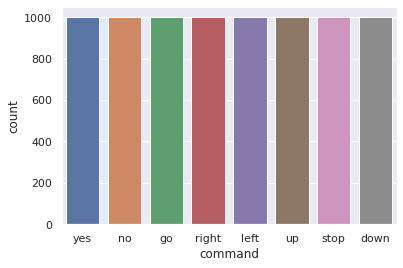

In [ ]:
sns.countplot(df['command']);

### Visualizando a distribuição da duração das gravações

In [ ]:
duration_of_recordings = []
for label in commands:
  #print(label)
  waves = [f for f in os.listdir('/content/mini_speech_commands/' + label) if f.endswith('.wav')]
  #print(waves)
  for wav in waves:
    data, sample_rate = librosa.load('/content/mini_speech_commands/' + label + '/' + wav, sr = 16000)
    duration_of_recordings.append(float(len(data) / sample_rate))

In [ ]:
print(duration_of_recordings)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.882375, 1.0, 0.768, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.882375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.896, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.768, 1.0, 1.0, 1.0, 0.896, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.768, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.768, 1.0, 0.7895, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.853375, 1.0, 1.0, 1.0, 0.725375, 0.8359375, 1.0, 1.0, 1.0, 1.0, 0.981375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.64, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.896, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8106875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.97525, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

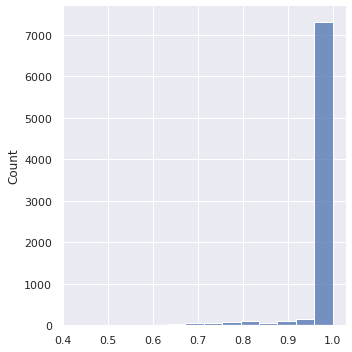

In [ ]:
sns.displot(duration_of_recordings);

## Visalizando os dados de áudio




### Waveforms

Canais:  1
Número total de amostras: 16000
Arquivo: /content/mini_speech_commands/left/a8ee11c7_nohash_0.wav
Taxa de amostragem: 16000
Duração:  1.0


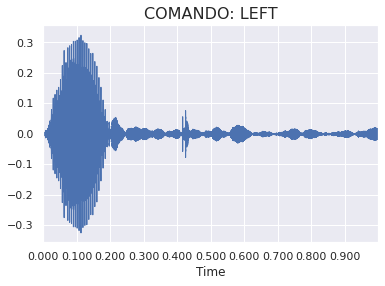

In [ ]:
n_files = df.shape[0]
rnd = np.random.randint(0, n_files)
fname = df.path[rnd] 
data, sample_rate = librosa.load(fname, sr=16000)

print('Canais: ',  len(data.shape))
print('Número total de amostras:', data.shape[0])
print('Arquivo:', fname)
print('Taxa de amostragem:', sample_rate)
print('Duração: ', len(data) / sample_rate)

info = df.iloc[rnd].values
title_txt = f'Comando: {info[0]}'
plt.title(title_txt.upper(), size=16)
ld.waveplot(data, sr=sample_rate)
Audio(data = data, rate = sample_rate)

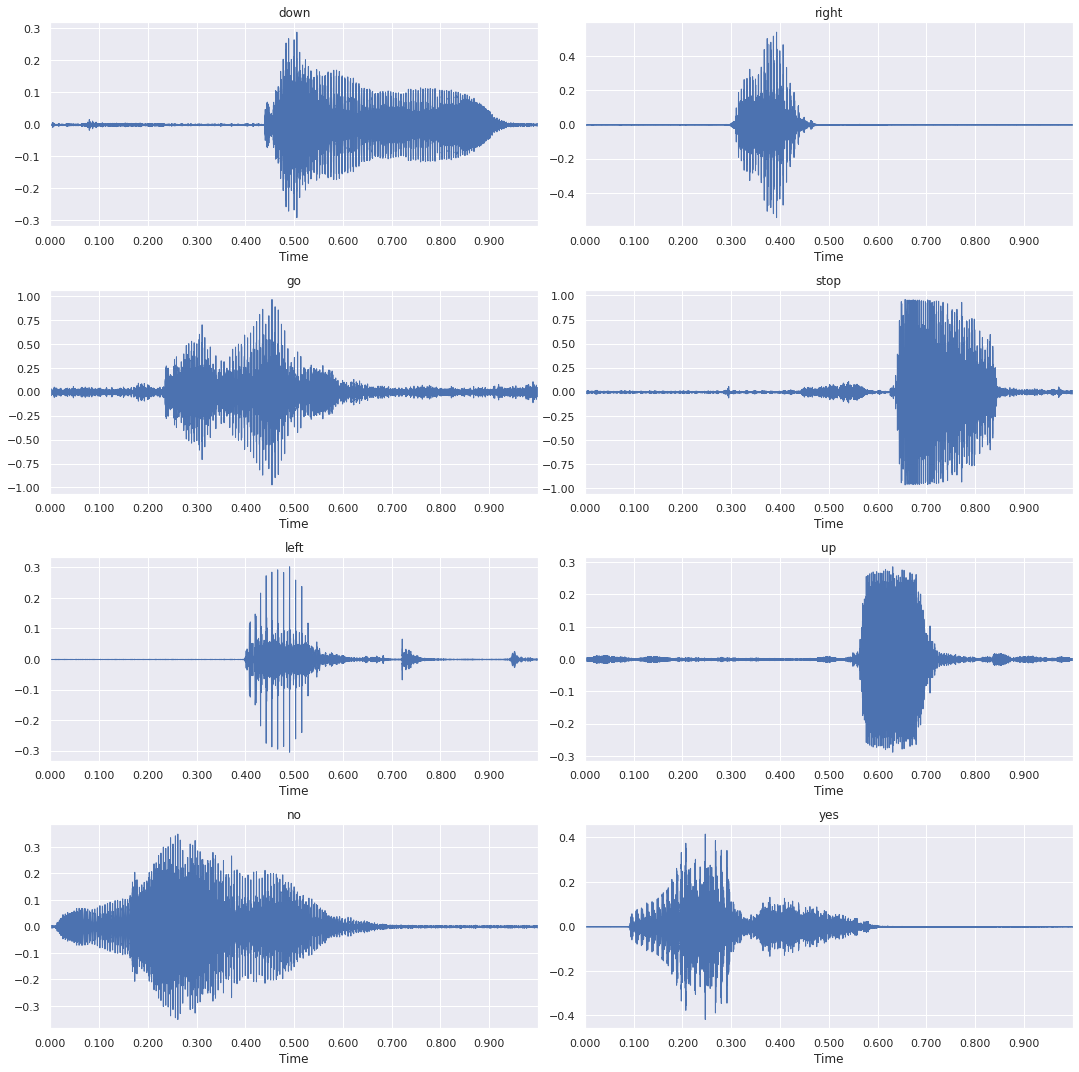

In [ ]:
random_samples = df.groupby('command').sample(1)
audio_samples, labels = random_samples['path'].tolist(), random_samples['command'].tolist()

rows=4
cols=2
fig, axs = plt.subplots(rows, cols, figsize=(15,15))
index = 0
for col in range(cols):
    for row in range(rows):
        data, sample_rate = librosa.load(audio_samples[index], sr = None)
        librosa.display.waveplot(data, sample_rate, ax=axs[row][col])        
        axs[row][col].set_title('{}'.format(labels[index]))
        index += 1
fig.tight_layout()

### Espectrogramas de STFT

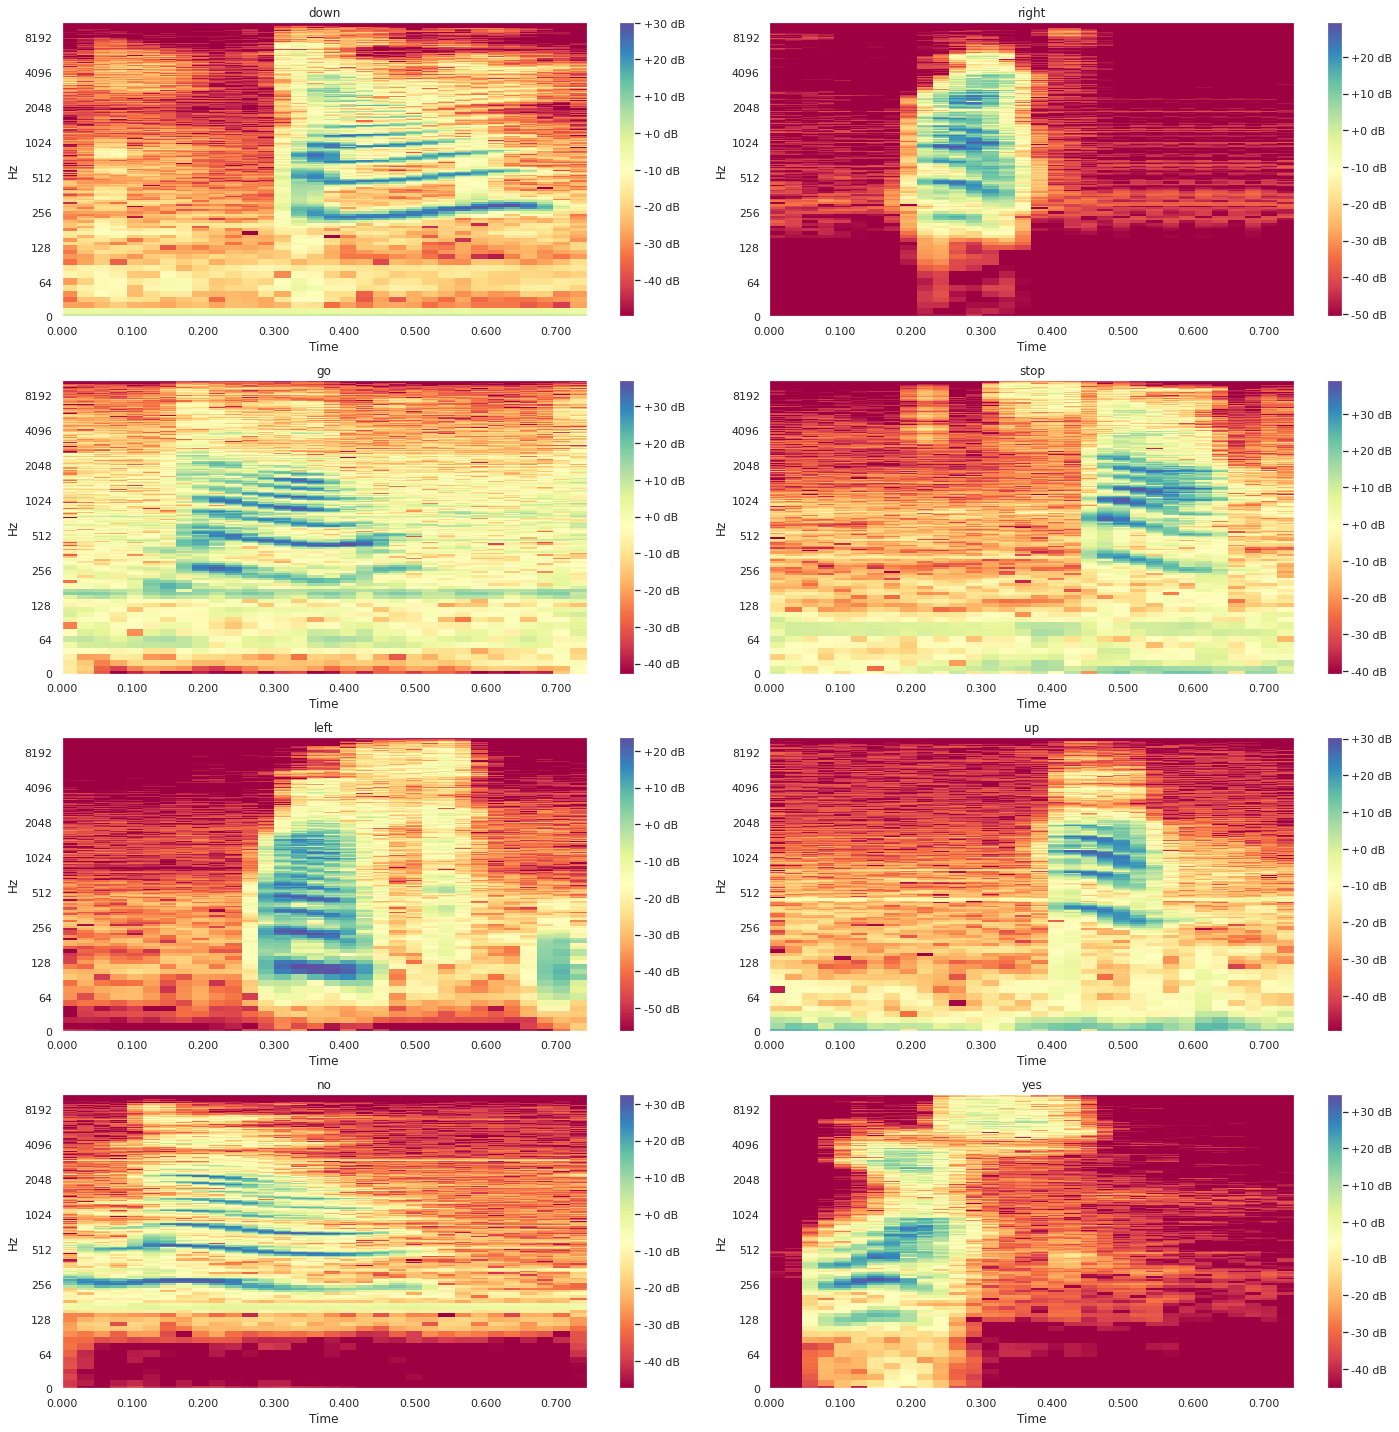

In [ ]:
fig, axs = plt.subplots(rows, cols, figsize=(20,20))
index = 0
for col in range(cols):
    for row in range(rows):
        data, sample_rate = librosa.load(audio_samples[index], sr = None)
        stft = librosa.stft(y = data)
        stft_db = librosa.amplitude_to_db(np.abs(stft))
        img = librosa.display.specshow(stft_db, x_axis="time", y_axis='log', ax=axs[row][col], cmap = 'Spectral')
        axs[row][col].set_title('{}'.format(labels[index]))
        fig.colorbar(img, ax=axs[row][col], format='%+2.f dB')
        index += 1
fig.tight_layout()

### Espectrogramas de MFCCs

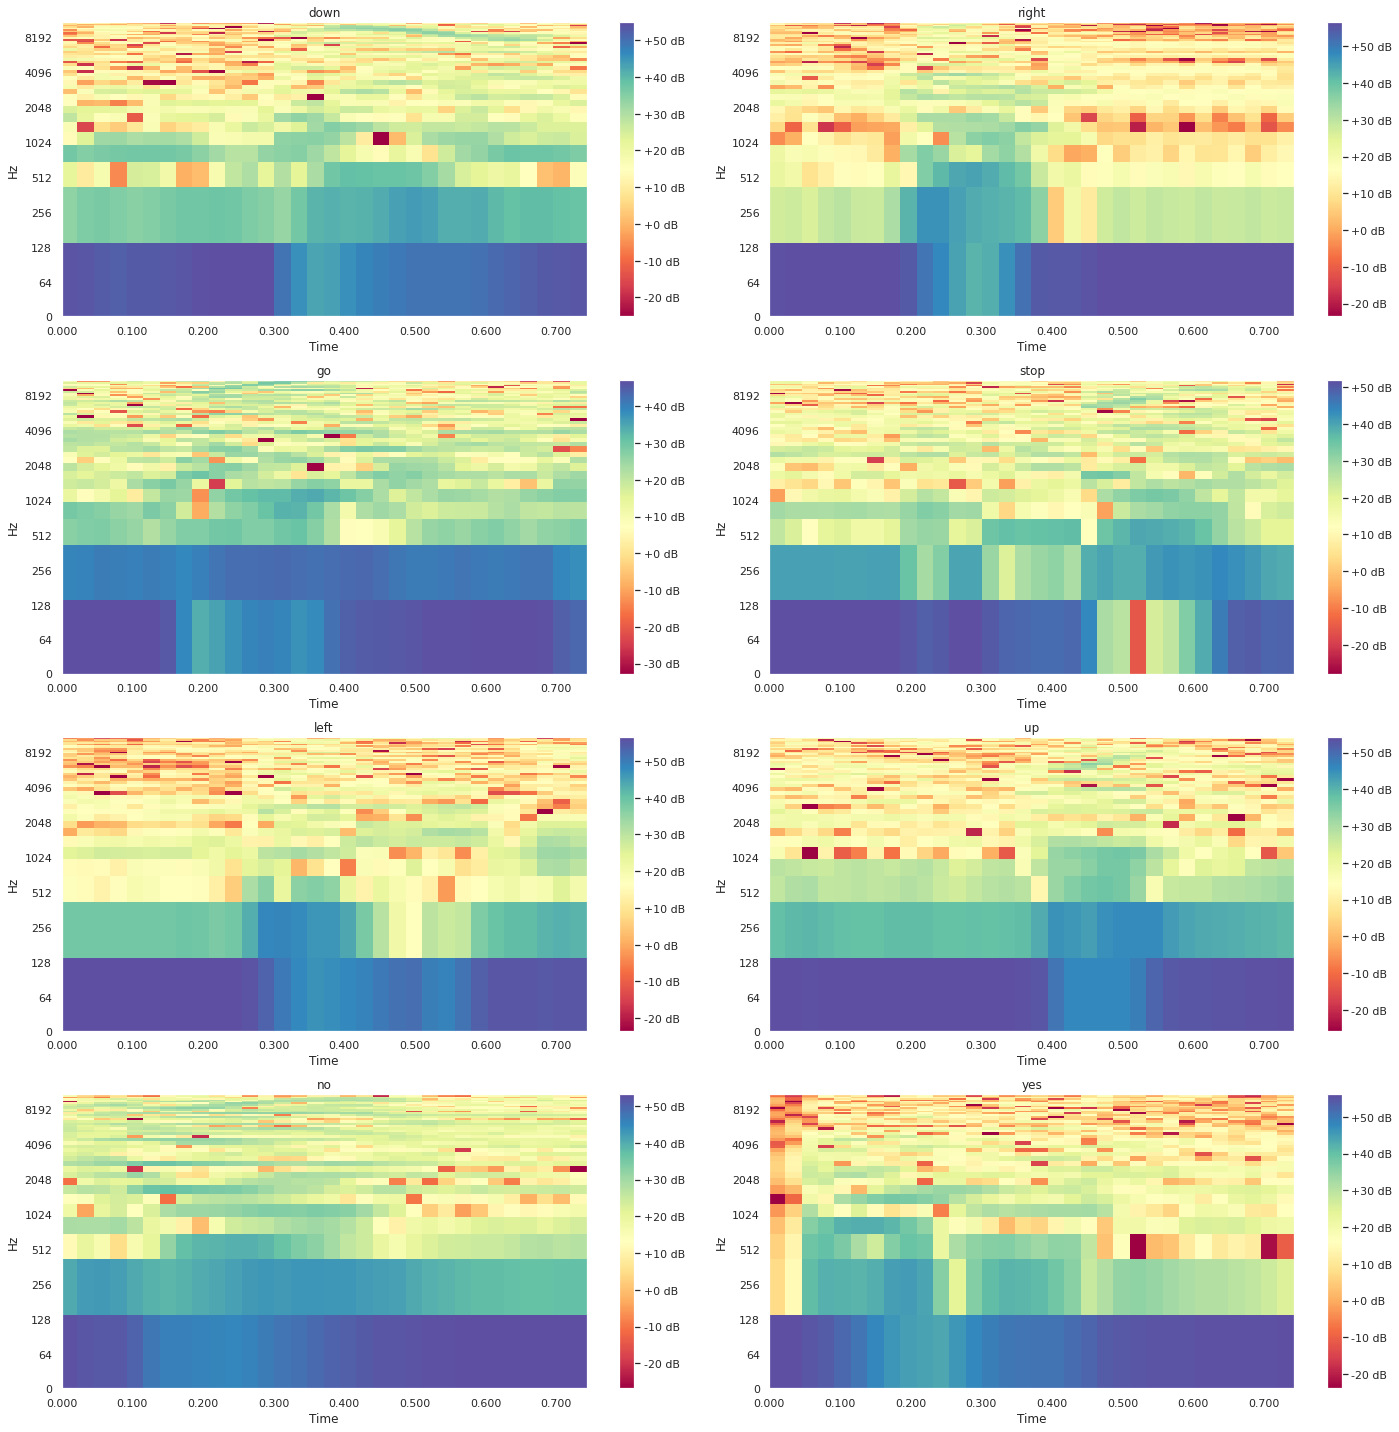

In [ ]:
fig, axs = plt.subplots(rows, cols, figsize=(20,20))
index = 0
for col in range(cols):
    for row in range(rows):
        data, sample_rate = librosa.load(audio_samples[index], sr = None)
        mfccs = librosa.feature.mfcc(y = data, sr=sample_rate, n_mfcc=40)
        mfccs_db = librosa.amplitude_to_db(np.abs(mfccs))
        img = librosa.display.specshow(mfccs_db, x_axis="time", y_axis='log', ax=axs[row][col], cmap = 'Spectral')
        axs[row][col].set_title('{}'.format(labels[index]))
        fig.colorbar(img, ax=axs[row][col], format='%+2.f dB')
        index += 1

fig.tight_layout()

# Pré-processamento

### Extraindo recursos/características MFCC's de cada arquivo de áudio do dataset

In [ ]:
print(speech_label_int)

[4, 2, 4, 3, 0, 7, 4, 4, 1, 3, 7, 4, 3, 0, 6, 7, 3, 1, 4, 7, 4, 1, 3, 0, 4, 7, 4, 5, 6, 1, 6, 2, 0, 7, 0, 7, 6, 4, 0, 2, 1, 3, 3, 5, 4, 0, 5, 5, 3, 4, 1, 1, 0, 6, 6, 6, 5, 5, 6, 6, 3, 6, 2, 3, 2, 7, 7, 6, 0, 5, 1, 3, 4, 5, 1, 7, 7, 0, 1, 0, 1, 6, 0, 7, 6, 2, 5, 3, 5, 3, 5, 3, 5, 6, 5, 7, 0, 1, 4, 5, 2, 4, 6, 7, 4, 2, 0, 4, 3, 1, 4, 2, 4, 1, 2, 4, 4, 0, 6, 7, 1, 6, 3, 3, 0, 7, 2, 0, 3, 3, 7, 7, 5, 6, 3, 1, 6, 3, 6, 2, 4, 7, 2, 1, 7, 7, 4, 6, 0, 5, 7, 1, 4, 6, 1, 2, 6, 2, 0, 2, 7, 0, 6, 7, 1, 5, 4, 2, 7, 6, 0, 0, 2, 0, 7, 4, 1, 2, 6, 3, 0, 7, 7, 7, 0, 0, 5, 2, 6, 7, 3, 4, 0, 1, 1, 7, 7, 2, 5, 5, 5, 1, 4, 3, 0, 7, 7, 2, 3, 1, 5, 3, 5, 6, 6, 2, 6, 2, 2, 2, 5, 7, 1, 7, 7, 1, 7, 3, 5, 3, 3, 5, 6, 0, 7, 5, 0, 3, 6, 1, 1, 0, 1, 4, 6, 5, 2, 1, 7, 1, 1, 4, 3, 2, 4, 4, 1, 5, 6, 3, 7, 6, 1, 1, 2, 7, 0, 1, 2, 6, 5, 6, 2, 3, 0, 7, 1, 4, 5, 7, 4, 2, 2, 0, 6, 0, 7, 7, 1, 0, 5, 6, 7, 1, 5, 6, 1, 6, 1, 3, 3, 4, 0, 2, 5, 4, 7, 5, 0, 1, 5, 0, 3, 2, 4, 1, 7, 6, 3, 2, 3, 4, 1, 1, 2, 6, 0, 1, 5, 1, 6, 1, 4, 

In [ ]:
loaded_speech_data

[(array([ 0.00097656,  0.00112915,  0.00109863, ..., -0.00234985,
         -0.00195312, -0.00158691], dtype=float32), 16000),
 (array([-0.00033569, -0.00094604, -0.00125122, ..., -0.00076294,
         -0.00094604, -0.00076294], dtype=float32), 16000),
 (array([0.00064087, 0.00067139, 0.0007019 , ..., 0.00112915, 0.00088501,
         0.00064087], dtype=float32), 16000),
 (array([-0.0007019 , -0.00030518,  0.00247192, ...,  0.00027466,
          0.00210571,  0.00216675], dtype=float32), 16000),
 (array([-0.00021362, -0.00039673, -0.00045776, ..., -0.00088501,
         -0.00088501, -0.00061035], dtype=float32), 16000),
 (array([ 0.0000000e+00, -3.0517578e-05, -3.0517578e-05, ...,
          0.0000000e+00,  0.0000000e+00, -6.1035156e-05], dtype=float32),
  16000),
 (array([-0.00033569, -0.00125122, -0.00073242, ..., -0.01953125,
         -0.04891968, -0.06829834], dtype=float32), 16000),
 (array([-3.0517578e-05, -3.0517578e-05,  3.0517578e-05, ...,
         -3.0517578e-04, -1.5258789e-04, -

In [ ]:
loaded_speech_data[0][0]

array([ 0.00097656,  0.00112915,  0.00109863, ..., -0.00234985,
       -0.00195312, -0.00158691], dtype=float32)

In [ ]:
loaded_speech_data[0][1]

16000

In [ ]:
speech_data_mfcc = []
for loaded_audio in tqdm(loaded_speech_data):
  speech_data_mfcc.append(librosa.feature.mfcc(loaded_audio[0], loaded_audio[1]))

100%|██████████| 8000/8000 [01:10<00:00, 112.90it/s]


In [ ]:
len(speech_data_mfcc)

8000

### Definindo a proporção da base de dados em treinamento, validação e teste

* 70% (0.7) para treinar;
* Para a validação usamos 15% (0.15);
* E para teste o restante da base de dados 15% (0.15).


In [ ]:
speech_data_as_tensor = []
for index in range(len(speech_data_mfcc)):
  mfcc_array = np.copy(speech_data_mfcc[index])
  mfcc_array.resize((20,32), refcheck = False)
  speech_data_as_tensor.append(tf.expand_dims(tf.convert_to_tensor(mfcc_array), -1))

In [ ]:
type(speech_data_as_tensor)

list

In [ ]:
speech_data_as_tensor[0].shape

TensorShape([20, 32, 1])

In [ ]:
training_slice = speech_data_as_tensor[:5600]
validation_slice = speech_data_as_tensor[5600:5600 + 1200]
testing_slice = speech_data_as_tensor[5600 + 1200:]

In [ ]:
training_dataset = tf.data.Dataset.from_tensor_slices((training_slice, speech_label_int[:5600]))
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_slice, speech_label_int[5600:5600+1200]))
testing_dataset = tf.data.Dataset.from_tensor_slices((testing_slice, speech_label_int[-1200:]))

In [ ]:
# https://www.gcptutorials.com/article/how-to-use-batch-method-in-tensorflow
batch_size = 10
training_dataset = training_dataset.batch(batch_size)
validation_dataset = validation_dataset.batch(batch_size)

# Criando o modelo

In [ ]:
num_labels = len(commands)
num_labels

8

In [ ]:
norm_layer = layers.Normalization()
model = models.Sequential([
                           layers.Input(shape=(20,32,1)),
                           layers.Resizing(32,32),
                           norm_layer,
                           layers.Conv2D(32, 3, activation = 'relu'),
                           layers.Conv2D(64, 3, activation='relu'),
                           layers.MaxPooling2D(),
                           layers.Dropout(0.25),
                           layers.Flatten(),
                           layers.Dense(128, activation = 'relu'),
                           layers.Dropout(0.25),
                           layers.Dense(num_labels), # logits
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0

In [ ]:
14 * 14 * 64

12544

In [ ]:
print(speech_label_int) # OneHotEncoder

[4, 2, 4, 3, 0, 7, 4, 4, 1, 3, 7, 4, 3, 0, 6, 7, 3, 1, 4, 7, 4, 1, 3, 0, 4, 7, 4, 5, 6, 1, 6, 2, 0, 7, 0, 7, 6, 4, 0, 2, 1, 3, 3, 5, 4, 0, 5, 5, 3, 4, 1, 1, 0, 6, 6, 6, 5, 5, 6, 6, 3, 6, 2, 3, 2, 7, 7, 6, 0, 5, 1, 3, 4, 5, 1, 7, 7, 0, 1, 0, 1, 6, 0, 7, 6, 2, 5, 3, 5, 3, 5, 3, 5, 6, 5, 7, 0, 1, 4, 5, 2, 4, 6, 7, 4, 2, 0, 4, 3, 1, 4, 2, 4, 1, 2, 4, 4, 0, 6, 7, 1, 6, 3, 3, 0, 7, 2, 0, 3, 3, 7, 7, 5, 6, 3, 1, 6, 3, 6, 2, 4, 7, 2, 1, 7, 7, 4, 6, 0, 5, 7, 1, 4, 6, 1, 2, 6, 2, 0, 2, 7, 0, 6, 7, 1, 5, 4, 2, 7, 6, 0, 0, 2, 0, 7, 4, 1, 2, 6, 3, 0, 7, 7, 7, 0, 0, 5, 2, 6, 7, 3, 4, 0, 1, 1, 7, 7, 2, 5, 5, 5, 1, 4, 3, 0, 7, 7, 2, 3, 1, 5, 3, 5, 6, 6, 2, 6, 2, 2, 2, 5, 7, 1, 7, 7, 1, 7, 3, 5, 3, 3, 5, 6, 0, 7, 5, 0, 3, 6, 1, 1, 0, 1, 4, 6, 5, 2, 1, 7, 1, 1, 4, 3, 2, 4, 4, 1, 5, 6, 3, 7, 6, 1, 1, 2, 7, 0, 1, 2, 6, 5, 6, 2, 3, 0, 7, 1, 4, 5, 7, 4, 2, 2, 0, 6, 0, 7, 7, 1, 0, 5, 6, 7, 1, 5, 6, 1, 6, 1, 3, 3, 4, 0, 2, 5, 4, 7, 5, 0, 1, 5, 0, 3, 2, 4, 1, 7, 6, 3, 2, 3, 4, 1, 1, 2, 6, 0, 1, 5, 1, 6, 1, 4, 

In [ ]:
model.compile(optimizer = 'adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

# Treinando o modelo

In [ ]:
EPOCHS = 15
BATCH_SIZE = 64

checkpointer = (tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
                tf.keras.callbacks.ModelCheckpoint(filepath='/content/saved_models/voice_command_recognition.hdf5', 
                                                   save_best_only=True))

start = datetime.now()
model_history = model.fit(training_dataset, validation_data=validation_dataset, batch_size=BATCH_SIZE,  
                          epochs=EPOCHS, callbacks=[checkpointer],
)
duration = datetime.now() - start
print("Treinamento concluído em: ", duration)

Epoch 1/15
560/560 [==============================] - 31s 52ms/step - loss: 1.8303 - accuracy: 0.4613 - val_loss: 0.9519 - val_accuracy: 0.6825
Epoch 2/15
560/560 [==============================] - 28s 49ms/step - loss: 0.7992 - accuracy: 0.7152 - val_loss: 0.8254 - val_accuracy: 0.7083
Epoch 3/15
560/560 [==============================] - 28s 49ms/step - loss: 0.5665 - accuracy: 0.8030 - val_loss: 0.7944 - val_accuracy: 0.7225
Epoch 4/15
560/560 [==============================] - 28s 49ms/step - loss: 0.4124 - accuracy: 0.8530 - val_loss: 0.7966 - val_accuracy: 0.7400
Epoch 5/15
560/560 [==============================] - 29s 51ms/step - loss: 0.3225 - accuracy: 0.8873 - val_loss: 0.8561 - val_accuracy: 0.7467
Epoch 5: early stopping
Treinamento concluído em:  0:03:13.949467


# Avaliando o modelo

In [ ]:
test_audio_data = []
test_label_data = []
for audio, label in testing_dataset:
  #print(audio)
  #print(label)
  test_audio_data.append(audio.numpy())
  test_label_data.append(label.numpy())

In [ ]:
test_audio_data = np.array(test_audio_data)
test_label_data = np.array(test_label_data)

In [ ]:
test_audio_data

In [ ]:
test_label_data

array([2, 0, 7, ..., 0, 0, 5], dtype=int32)

In [ ]:
y_pred = np.argmax(model.predict(test_audio_data), axis = 1)
y_pred

array([2, 0, 7, ..., 0, 0, 5])

In [ ]:
y_true = test_label_data
y_true

array([2, 0, 7, ..., 0, 0, 5], dtype=int32)

In [ ]:
print('Taxa de acerto: ', sum(y_pred == y_true) / len(y_true))

Taxa de acerto:  0.76


# Exbindo as métricas de precisão e perda do modelo

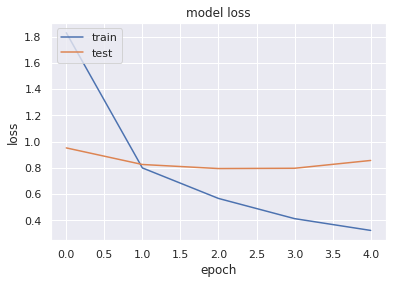

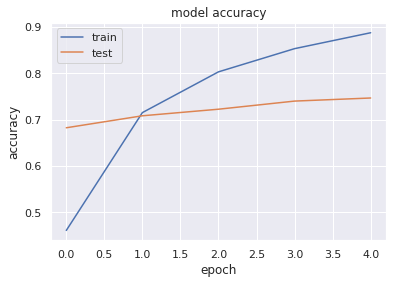

In [ ]:
metrics = model_history.history
plt.plot(model_history.epoch, metrics['loss'], metrics['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model_history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Exibindo a Matriz de confusão

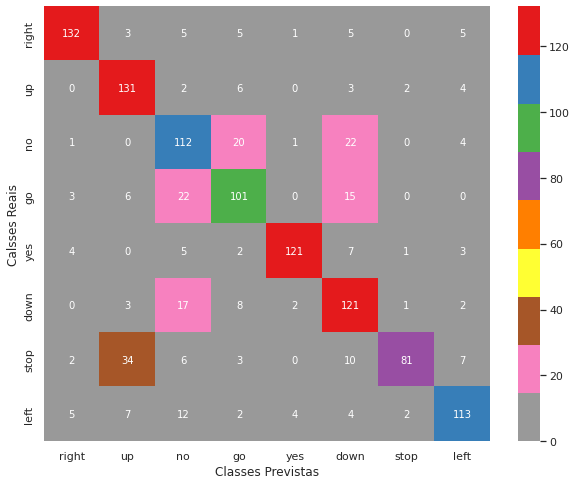

In [ ]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=commands_dict, yticklabels=commands_dict, annot=True, fmt='g', cmap='Set1_r')
plt.xlabel('Classes Previstas')
plt.ylabel('Calsses Reais')
plt.show()

# Executar inferência em um arquivo de áudio

In [ ]:
def predict(sample_file):
  audio, sample_rate = librosa.load(sample_file, sr = 16000)
  mfcc = librosa.feature.mfcc(audio)
  mfcc_array = np.copy(mfcc)
  mfcc_array.resize((20,32), refcheck=False)
  speech_tensor = tf.expand_dims(tf.convert_to_tensor(mfcc_array), -1)
  speech_tensor = tf.expand_dims(speech_tensor, axis = 0)
  prediction = model(speech_tensor)
  index = np.argmax(prediction[0])
  result = 'Comando previsto: ' + commands[index]
  plt.bar(commands, tf.nn.softmax(prediction[0]), color = list('rgbkymc'))
  plt.title(str(result).upper())

Arquivo:  2035
Path:  /content/mini_speech_commands/down/0e17f595_nohash_0.wav


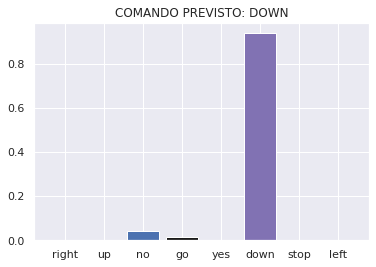

In [ ]:
filenames = tf.io.gfile.glob('/content/mini_speech_commands' + '/*/*')
n_files = len(filenames)
#print(n_files)
rnd = np.random.randint(0, n_files)
#print(rnd)
fname = filenames[rnd]
#print(fname)
print('Arquivo: ', rnd)
print('Path: ', fname)
predict(fname)
audio, sample_rate = librosa.load(fname, sr = 16000)
Audio(data = audio, rate = sample_rate)